In [1]:
import pyart
from matplotlib import pyplot as plt
import matplotlib
from netCDF4 import num2date, date2num
import numpy as np
from time import time
%matplotlib inline

In [36]:
filename = '/Users/scollis/Downloads/PGUA_20150515_0838'
radar = pyart.io.read(filename)

In [54]:
gatefilter = pyart.correct.GateFilter(radar)
gatefilter.exclude_masked('velocity')

In [80]:
corr_vel = pyart.correct.dealias_region_based(
    radar, vel_field='velocity', keep_original=False, gatefilter = gatefilter, nyquist_vel=35.55)
radar.add_field('corrected_velocity', corr_vel, True)


(-120, 120)

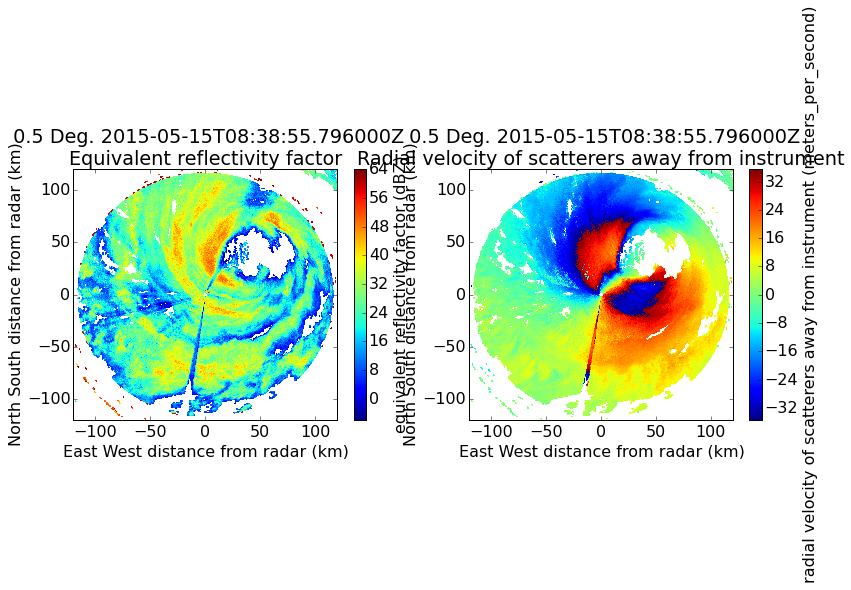

In [87]:
xlim = [-120, 120]
ylim = [-120,120]
nyq = radar.instrument_parameters['nyquist_velocity']['data'][0]
my_display = pyart.graph.RadarDisplay(radar)
tilt = 1
f = plt.figure(figsize=[13,4.5])
plt.subplot(1,2,1)
my_display.plot_ppi('reflectivity', tilt, vmin=-6, vmax=64.0)
plt.xlim(xlim)
plt.ylim(ylim)
plt.subplot(1,2,2)
my_display.plot_ppi('velocity', tilt, vmin=-35.5, vmax=35.5)
plt.xlim(xlim)
plt.ylim(ylim)

(-120, 120)

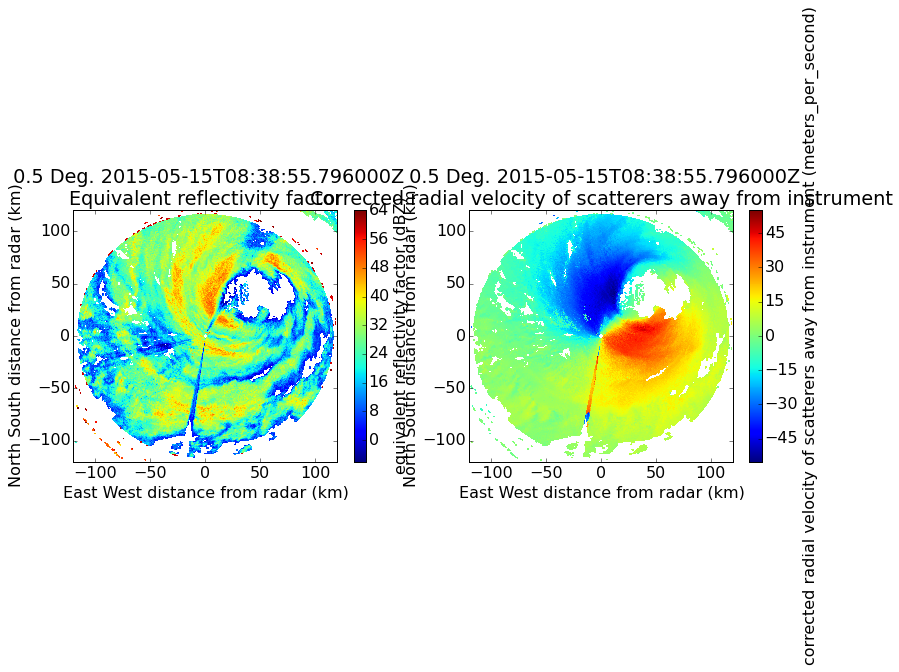

In [88]:

nyq = radar.instrument_parameters['nyquist_velocity']['data'][0]
my_display = pyart.graph.RadarDisplay(radar)
tilt = 1
f = plt.figure(figsize=[13,4.5])
plt.subplot(1,2,1)
my_display.plot_ppi('reflectivity', tilt, vmin=-6, vmax=64.0)
plt.xlim(xlim)
plt.ylim(ylim)
plt.subplot(1,2,2)
my_display.plot_ppi('corrected_velocity', tilt, vmin=-55, vmax=55)
plt.xlim(xlim)
plt.ylim(ylim)

In [96]:
grid = pyart.map.grid_from_radars(
         (radar,), grid_shape=(36, 601, 601),
        grid_limits=((0, 17000.0),(-120000, 120000), (-120000, 120000)), gridding_algo="map_gates_to_grid",
        weighting_function='BARNES')


In [97]:
print(grid.fields.keys())

['ROI', 'differential_phase', 'cross_correlation_ratio', 'spectrum_width', 'reflectivity', 'corrected_velocity', 'differential_reflectivity', 'velocity']


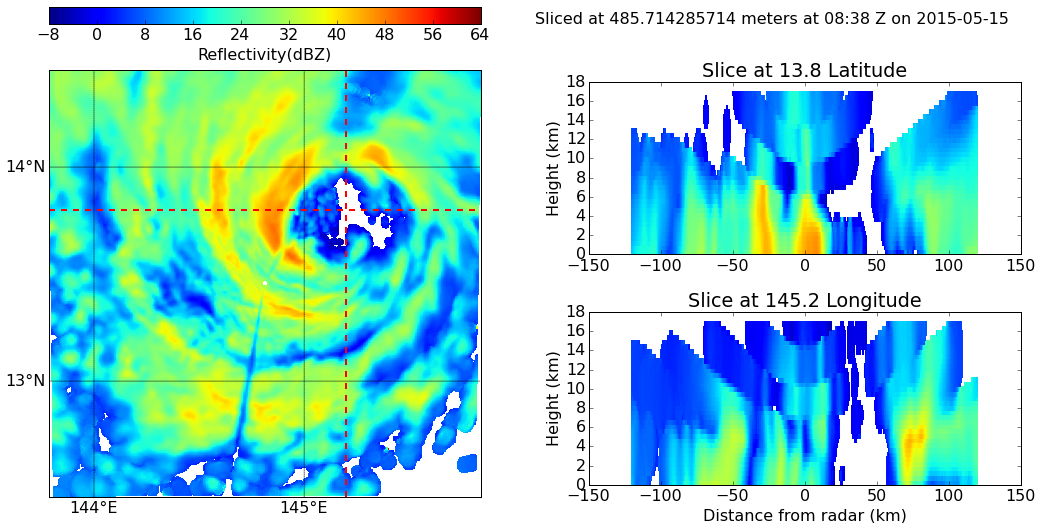

In [98]:
#13.5000° N, 144.8000° E
display = pyart.graph.GridMapDisplay(grid)

# create the figure
font = {'size': 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=[15, 8])

# panel sizes
map_panel_axes = [0.05, 0.05, .4, .80]
x_cut_panel_axes = [0.55, 0.10, .4, .30]
y_cut_panel_axes = [0.55, 0.50, .4, .30]
colorbar_panel_axes = [0.05, 0.90, .4, .03]

# parameters
level = 1
vmin = -8
vmax = 64
lat = 13.8
lon = 145.2

# panel 1, basemap, radar reflectivity and NARR overlay
ax1 = fig.add_axes(map_panel_axes)
display.plot_basemap(lon_lines = np.arange(142, 148, 1), lat_lines = np.arange(10,20,1) )
display.plot_grid('reflectivity', level=level, vmin=vmin, vmax=vmax)
display.plot_crosshairs(lon=lon, lat=lat)

# plot the reanalysis on the basemap
# colorbar
cbax = fig.add_axes(colorbar_panel_axes)
display.plot_colorbar(cax=cbax)

# panel 2, longitude slice.
ax2 = fig.add_axes(x_cut_panel_axes)
display.plot_longitude_slice('reflectivity', lon=lon, lat=lat, vmin=vmin, vmax=vmax)
ax2.set_xlabel('Distance from radar (km)')

# panel 3, latitude slice
ax3 = fig.add_axes(y_cut_panel_axes)
display.plot_latitude_slice('reflectivity', lon=lon, lat=lat, vmin=vmin, vmax=vmax)

# add a title
slc_height = grid.axes['z_disp']['data'][level]
dts = num2date(grid.axes['time']['data'], grid.axes['time']['units'])
datestr = dts[0].strftime('%H:%M Z on %Y-%m-%d')
title = 'Sliced at ' + str(slc_height) + ' meters at ' + datestr
fig.text(0.5, 0.9, title)
plt.show()



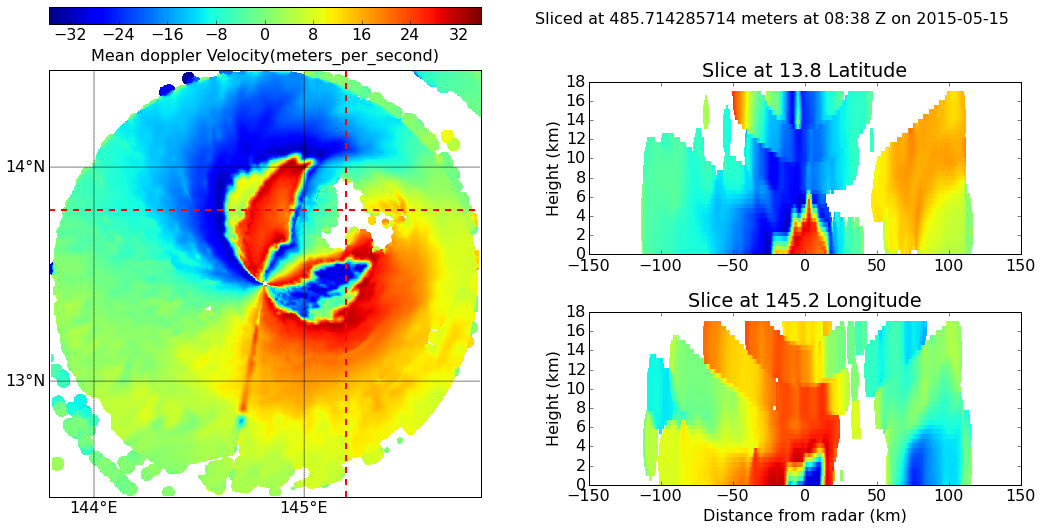

In [99]:
#13.5000° N, 144.8000° E
display = pyart.graph.GridMapDisplay(grid)

# create the figure
font = {'size': 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=[15, 8])
vmin = -35.55
vmax = 35.55

# panel sizes
map_panel_axes = [0.05, 0.05, .4, .80]
x_cut_panel_axes = [0.55, 0.10, .4, .30]
y_cut_panel_axes = [0.55, 0.50, .4, .30]
colorbar_panel_axes = [0.05, 0.90, .4, .03]

# parameters

# panel 1, basemap, radar reflectivity and NARR overlay
ax1 = fig.add_axes(map_panel_axes)
display.plot_basemap(lon_lines = np.arange(142, 148, 1), lat_lines = np.arange(10,20,1) )
display.plot_grid('velocity', level=level, vmin=vmin, vmax=vmax)
display.plot_crosshairs(lon=lon, lat=lat)

# plot the reanalysis on the basemap
# colorbar
cbax = fig.add_axes(colorbar_panel_axes)
display.plot_colorbar(cax=cbax)

# panel 2, longitude slice.
ax2 = fig.add_axes(x_cut_panel_axes)
display.plot_longitude_slice('velocity', lon=lon, lat=lat, vmin=vmin, vmax=vmax)
ax2.set_xlabel('Distance from radar (km)')

# panel 3, latitude slice
ax3 = fig.add_axes(y_cut_panel_axes)
display.plot_latitude_slice('velocity', lon=lon, lat=lat, vmin=vmin, vmax=vmax)

# add a title
slc_height = grid.axes['z_disp']['data'][level]
dts = num2date(grid.axes['time']['data'], grid.axes['time']['units'])
datestr = dts[0].strftime('%H:%M Z on %Y-%m-%d')
title = 'Sliced at ' + str(slc_height) + ' meters at ' + datestr
fig.text(0.5, 0.9, title)
plt.show()



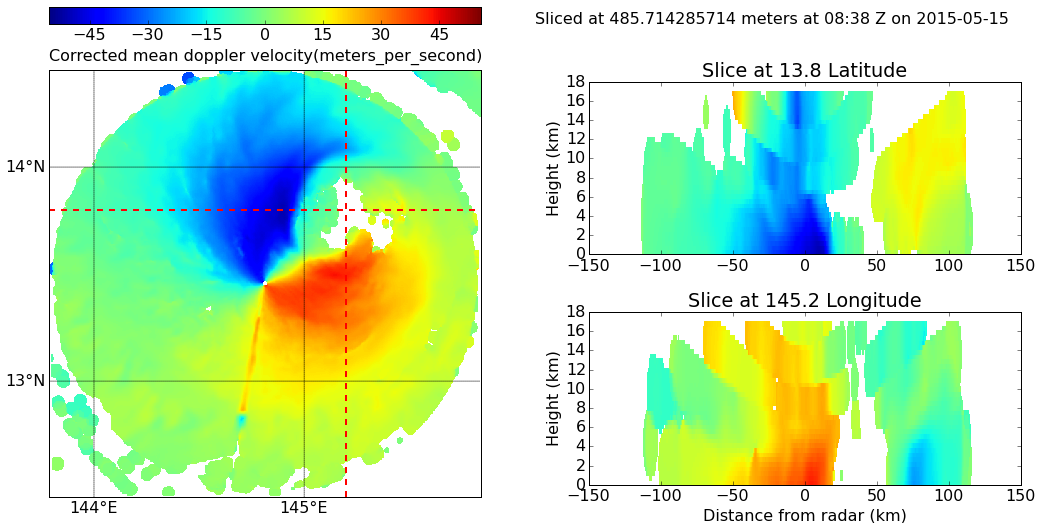

In [100]:
#13.5000° N, 144.8000° E
display = pyart.graph.GridMapDisplay(grid)

# create the figure
font = {'size': 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=[15, 8])
vmin = -55.55
vmax = 55.55

# panel sizes
map_panel_axes = [0.05, 0.05, .4, .80]
x_cut_panel_axes = [0.55, 0.10, .4, .30]
y_cut_panel_axes = [0.55, 0.50, .4, .30]
colorbar_panel_axes = [0.05, 0.90, .4, .03]

# parameters

# panel 1, basemap, radar reflectivity and NARR overlay
ax1 = fig.add_axes(map_panel_axes)
display.plot_basemap(lon_lines = np.arange(142, 148, 1), lat_lines = np.arange(10,20,1) )
display.plot_grid('corrected_velocity', level=level, vmin=vmin, vmax=vmax)
display.plot_crosshairs(lon=lon, lat=lat)

# plot the reanalysis on the basemap
# colorbar
cbax = fig.add_axes(colorbar_panel_axes)
display.plot_colorbar(cax=cbax)

# panel 2, longitude slice.
ax2 = fig.add_axes(x_cut_panel_axes)
display.plot_longitude_slice('corrected_velocity', lon=lon, lat=lat, vmin=vmin, vmax=vmax)
ax2.set_xlabel('Distance from radar (km)')

# panel 3, latitude slice
ax3 = fig.add_axes(y_cut_panel_axes)
display.plot_latitude_slice('corrected_velocity', lon=lon, lat=lat, vmin=vmin, vmax=vmax)

# add a title
slc_height = grid.axes['z_disp']['data'][level]
dts = num2date(grid.axes['time']['data'], grid.axes['time']['units'])
datestr = dts[0].strftime('%H:%M Z on %Y-%m-%d')
title = 'Sliced at ' + str(slc_height) + ' meters at ' + datestr
fig.text(0.5, 0.9, title)
plt.show()

